In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import nltk

In [3]:
# stop_word = ['и, а, но, да, если, что, когда, я, ты, твой, его', 'ее, его, ее, наш, в, без, до, для, за, через, над, по, из, у, около, под, о, про, на, к, перед, при']

nltk.download('stopwords')

stemmer = SnowballStemmer("russian")
russian_stopwords = stopwords.words("russian")
russian_stopwords

data = ['Британская полиция знает о местонахождении основателя WikiLeaks', 'В суде США начинается процесс против россиянина, рассылавшего спам', 'Церемонию вручения Нобелевской премии мира бойкотируют 19 стран', 'В Великобритании арестован основатель сайта Wikileaks Джулиан Ассандж', 'Украина игнорирует церемонию вручения Нобелевской премии', 'Шведский суд отказался рассматривать апелляцию основателя Wikileaks', 'НАТО и США разработали планы обороны стран Балтии против России', 'Полиция Великобритании нашла основателя WikiLeaks, но, не арестовала', 'В Стокгольме и Осло сегодня состоится вручение Нобелевских премий']




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
d = list(map(lambda el: el.lower(), data))
d = list(map(lambda el: el.replace(",", ""), d))
d = list(map(lambda el: el.replace(".", ""), d))
# d = list(map(lambda el: el.split(" "), d))

# s = list(map(lambda el: el.replace(",", ""), stop_word))
# s = list(map(lambda el: el.split(" "), s))
# res = []
# for x in s:
#     res.extend(x if isinstance(x, list) else [x])

# for el in russian_stopwords:
#     for item in d:
#         if el in item:
#             item.remove(el)
res= []
for el in d:
    res.append(' '.join([stemmer.stem(word) for word in el.split() if word not in russian_stopwords]))
res
res = list(map(lambda el: el.split(), res))
res


[['британск', 'полиц', 'знает', 'местонахожден', 'основател', 'wikileaks'],
 ['суд', 'сша', 'начина', 'процесс', 'прот', 'россиянин', 'рассыла', 'спам'],
 ['церемон', 'вручен', 'нобелевск', 'прем', 'мир', 'бойкотир', '19', 'стран'],
 ['великобритан',
  'арестова',
  'основател',
  'сайт',
  'wikileaks',
  'джулиа',
  'ассандж'],
 ['украин', 'игнорир', 'церемон', 'вручен', 'нобелевск', 'прем'],
 ['шведск',
  'суд',
  'отказа',
  'рассматрива',
  'апелляц',
  'основател',
  'wikileaks'],
 ['нат',
  'сша',
  'разработа',
  'план',
  'оборон',
  'стран',
  'балт',
  'прот',
  'росс'],
 ['полиц', 'великобритан', 'нашл', 'основател', 'wikileaks', 'арестова'],
 ['стокгольм', 'осл', 'сегодн', 'состо', 'вручен', 'нобелевск', 'прем']]

In [5]:
word = set()
for el in res:
    for subel in el:
        word.add(subel)
word

{'19',
 'wikileaks',
 'апелляц',
 'арестова',
 'ассандж',
 'балт',
 'бойкотир',
 'британск',
 'великобритан',
 'вручен',
 'джулиа',
 'знает',
 'игнорир',
 'местонахожден',
 'мир',
 'нат',
 'начина',
 'нашл',
 'нобелевск',
 'оборон',
 'осл',
 'основател',
 'отказа',
 'план',
 'полиц',
 'прем',
 'прот',
 'процесс',
 'разработа',
 'рассматрива',
 'рассыла',
 'росс',
 'россиянин',
 'сайт',
 'сегодн',
 'состо',
 'спам',
 'стокгольм',
 'стран',
 'суд',
 'сша',
 'украин',
 'церемон',
 'шведск'}

In [6]:
unique = []
for el in word:
    sum = 0
    for item in res:
        sum += item.count(el)
    if sum == 1:
        unique.append(el)

unique

['начина',
 'стокгольм',
 'нат',
 'знает',
 'джулиа',
 'россиянин',
 'разработа',
 'рассыла',
 'план',
 'бойкотир',
 '19',
 'мир',
 'росс',
 'осл',
 'сайт',
 'нашл',
 'отказа',
 'спам',
 'рассматрива',
 'балт',
 'состо',
 'оборон',
 'украин',
 'процесс',
 'апелляц',
 'сегодн',
 'местонахожден',
 'британск',
 'игнорир',
 'шведск',
 'ассандж']

In [7]:
for el in res:
    for item in unique:
        if item in el:
            el.remove(item)
word.clear()
for el in res:
    for subel in el:
        word.add(subel)
w = list(word)
w = sorted(w, key = lambda el: el)
w

['wikileaks',
 'арестова',
 'великобритан',
 'вручен',
 'нобелевск',
 'основател',
 'полиц',
 'прем',
 'прот',
 'стран',
 'суд',
 'сша',
 'церемон']

In [8]:
A = np.zeros((len(w),len(res)), dtype=int)
for i in range(len(w)):
    for j in range(len(res)):
        if w[i] in res[j]:
            A[i][j] = 1
A

array([[1, 0, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [9]:
U, W, VT = np.linalg.svd(A)
U1 = U[:,0:2]
U1

array([[-0.57374475,  0.00620486],
       [-0.33995391,  0.00414783],
       [-0.33995391,  0.00414783],
       [-0.00439496, -0.51834402],
       [-0.00439496, -0.51834402],
       [-0.57374475,  0.00620486],
       [-0.30805437,  0.00372811],
       [-0.00439496, -0.51834402],
       [-0.01664101, -0.03357136],
       [-0.0051497 , -0.2248939 ],
       [-0.12227081, -0.00616187],
       [-0.01664101, -0.03357136],
       [-0.00326389, -0.37545147]])

In [10]:
VT1 = VT[0:2, :]
VT1

array([[-0.42631592, -0.04556005, -0.006326  , -0.53522851, -0.0048177 ,
        -0.37190156, -0.01125631, -0.62545491, -0.00386173],
       [ 0.00489193, -0.02222114, -0.65336888,  0.00627651, -0.58519582,
         0.00189393, -0.08852632,  0.00740663, -0.47138359]])

In [11]:
W1 = W[0:2]
W1
W1=np.diag(W1)
W1

array([[3.41423762, 0.        ],
       [0.        , 3.2988676 ]])

In [12]:
R = np.matmul(np.matmul(U1, W1), VT1)
print(R.shape)
R

(13, 9)


array([[ 8.35210781e-01,  8.87927758e-02, -9.81799132e-04,
         1.04858808e+00, -2.54098024e-03,  7.28557073e-01,
         2.02379536e-02,  1.22535579e+00, -2.08399795e-03],
       [ 4.94884760e-01,  5.25767380e-02, -1.59765085e-03,
         6.21316733e-01, -2.41549153e-03,  4.31685891e-01,
         1.18536965e-02,  7.26056484e-01, -1.96775581e-03],
       [ 4.94884760e-01,  5.25767380e-02, -1.59765085e-03,
         6.21316733e-01, -2.41549153e-03,  4.31685891e-01,
         1.18536965e-02,  7.26056484e-01, -1.96775581e-03],
       [-1.96789181e-03,  3.86806402e-02,  1.11732194e+00,
        -2.70116917e-03,  1.00072689e+00,  2.34201269e-03,
         1.51544337e-01, -3.27972902e-03,  8.06099522e-01],
       [-1.96789181e-03,  3.86806402e-02,  1.11732194e+00,
        -2.70116917e-03,  1.00072689e+00,  2.34201269e-03,
         1.51544337e-01, -3.27972902e-03,  8.06099522e-01],
       [ 8.35210781e-01,  8.87927758e-02, -9.81799132e-04,
         1.04858808e+00, -2.54098024e-03,  7.285570

2

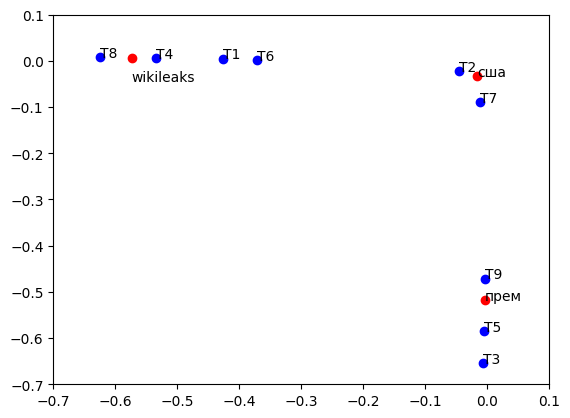

In [22]:
fig, ax = plt.subplots()
x = U1[:,0]
y=U1[:,1]

x1 = VT1[0,:]
y1 = VT1[1,:]
ax.set_xlim(-0.7,0.1)
ax.set_ylim(-0.7,0.1)
ax.text(x[0],y[0]-0.05, w[0])
ax.scatter(x[0],y[0], c='r')
ax.text(x[7],y[7], w[7])
ax.scatter(x[7],y[7], c='r')
ax.text(x[11],y[11], w[11])
ax.scatter(x[11],y[11], c='r')

for i in range(len(x1)):
    ax.text(x1[i], y1[i], 'T{}'.format(i+1))
    ax.scatter(x1[i], y1[i],c='b')

def min_ras(n):
    x0 = VT1[0,n-1]
    y0 = VT1[1,n-1]
    min = 1000000
    index = 0
    for i in range(len(VT1[0,:])):
        if i != n-1:
            current_min = np.sqrt( (x0-VT1[0,i])**2 + (y0-VT1[1,i])**2)
            if current_min <= min:
                min = current_min
                index = i+1
    return index

min_ras(7)